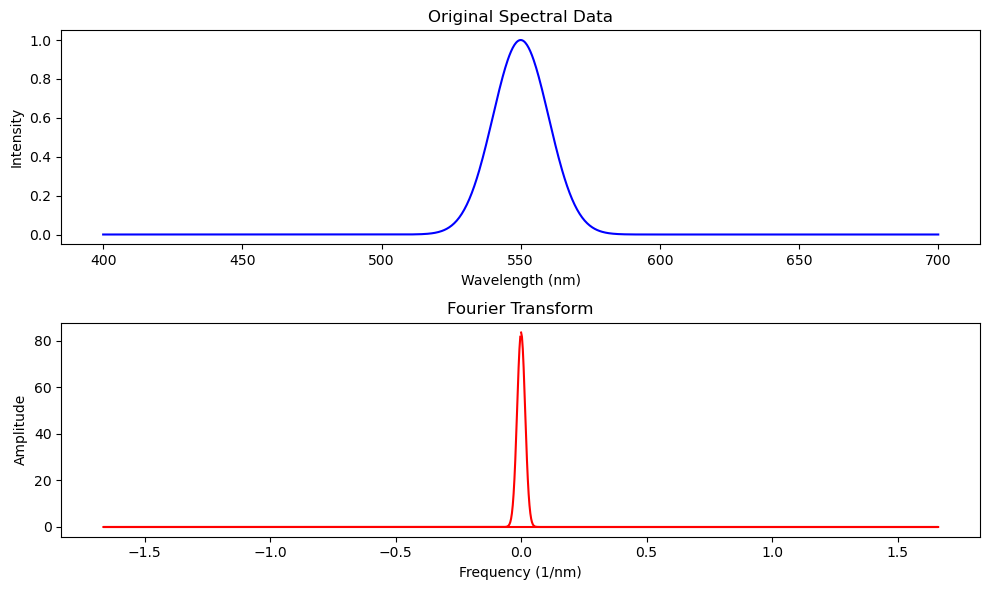

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic spectral data (replace this with your actual data)
wavelength = np.linspace(400, 700, 1000)  # Wavelength range (in nm)
intensity = np.exp(-(wavelength - 550)**2 / (2 * 10**2))  # Gaussian spectral line

# Perform Fourier transform
spectral_fft = np.fft.fft(intensity)

# Calculate frequency axis
sampling_rate = 1 / (wavelength[1] - wavelength[0])  # Sampling rate
freq = np.fft.fftfreq(len(wavelength), d=1/sampling_rate)

# Plot original spectral data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(wavelength, intensity, color='blue')
plt.title('Original Spectral Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

# Plot Fourier transform
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(spectral_fft), color='red')
plt.title('Fourier Transform')
plt.xlabel('Frequency (1/nm)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


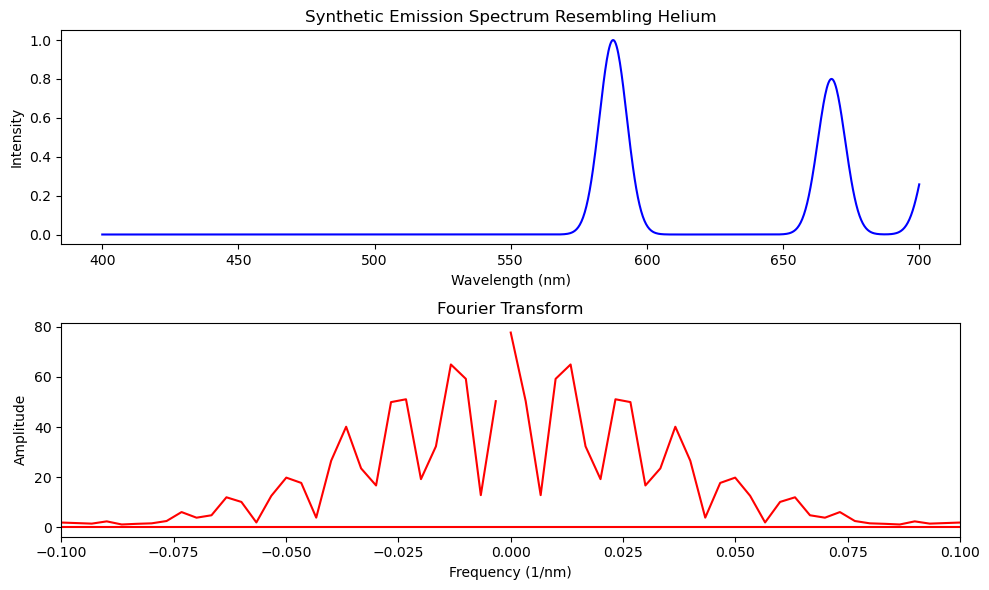

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic emission spectrum resembling helium
wavelength = np.linspace(400, 700, 1000)  # Wavelength range (in nm)
intensity = np.zeros_like(wavelength)

# Define positions and intensities of helium spectral lines
helium_lines = {
    587.6: 1.0,  # Yellow line
    667.8: 0.8,  # Red line
    706.5: 0.6   # Deep red line
}

# Add Gaussian-like peaks for helium spectral lines
peak_width = 5
for position, intensity_factor in helium_lines.items():
    intensity += intensity_factor * np.exp(-(wavelength - position)**2 / (2 * peak_width**2))

# Perform Fourier transform
spectral_fft = np.fft.fft(intensity)

# Calculate frequency axis
sampling_rate = 1 / (wavelength[1] - wavelength[0])  # Sampling rate
freq = np.fft.fftfreq(len(wavelength), d=1/sampling_rate)

# Plot original spectral data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(wavelength, intensity, color='blue')
plt.title('Synthetic Emission Spectrum Resembling Helium')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

# Plot Fourier transform
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(spectral_fft), color='red')
plt.title('Fourier Transform')
plt.xlabel('Frequency (1/nm)')
plt.ylabel('Amplitude')
plt.xlim(-0.1, 0.1)

plt.tight_layout()
plt.show()


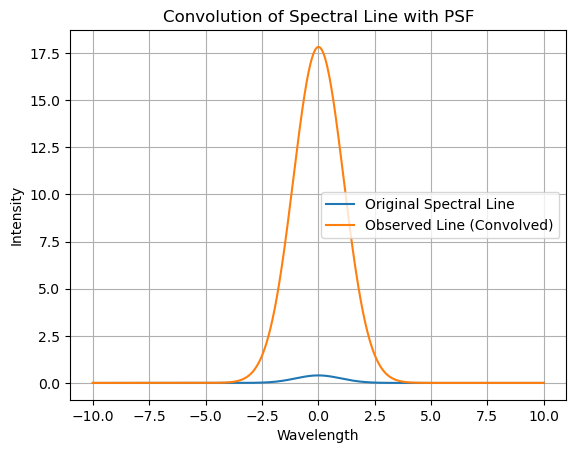

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian curve
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) / sigma)**2 / 2) / (sigma * np.sqrt(2 * np.pi))

# Generate x values
x_line = np.linspace(-10, 10, 1000)

# Generate the original spectral line (a narrow Gaussian)
spectral_line = gaussian(x_line, mu=0, sigma=1)

# Generate the PSF (another Gaussian)
psf = gaussian(x_line, mu=0, sigma=0.5)

# Convolve the spectral line with the PSF
convolved_line = np.convolve(spectral_line, psf, mode='same')

# Plot the original spectral line and the convolved line
plt.plot(x_line, spectral_line, label='Original Spectral Line')
plt.plot(x_line, convolved_line, label='Observed Line (Convolved)')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Convolution of Spectral Line with PSF')
plt.legend()
plt.grid(True)
plt.show()
